# <center >Data Science with Python 
## <center >Statistical and Data Technique in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the folder attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [8]:
import pandas as pd
import numpy as np
# Write your code from here, add more cells if needed
path='C:\\Users\\nn\\Dropbox\\PythonDataScienceCourse\\week5\\customers.csv'
data=pd.read_csv(path,sep=',')
print('Head is:\n',data.head())
print('Shape is: ',data.shape)
print('Data type is: ',data.dtypes)
print(data.columns.tolist())
df=data.drop(['Channel','Region'],axis=1)
#df.head()
data_filt=df.astype(float).drop(['Frozen','Detergents_Paper', 'Delicatessen'],axis=1)


Head is:
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
Shape is:  (440, 8)
Data type is:  Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object
['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']


### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

Mean spending on grocery: count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64
Range of spending: 92777.0
Skewness is:  3.5751872200807875
Kurtosis is:  20.664153228293365


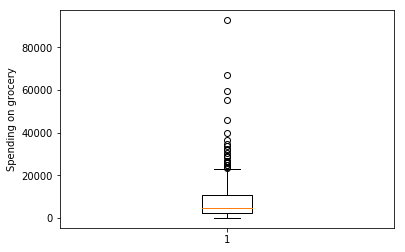

In [15]:
from scipy.stats import kurtosis, skew
from matplotlib import pyplot
# Write your answer from here, add more cells if needed
minimum=min(data_filt['Grocery'])
#print('Mininum of Grocery products: ',minimum)
#print('Q1 is:',data_filt['Grocery'].quantile(q=0.25))
#print('Median is:',data_filt['Grocery'].quantile(q=0.5))
#print('Q3 is:',data_filt['Grocery'].quantile(q=0.75))
#maximum=max(data_filt['Grocery'])
#print('Maxinum of Grocery products: ',maximum)
print('Mean spending on grocery:',data_filt['Grocery'].describe())
print('Range of spending:',max(data_filt['Grocery'])-min(data_filt['Grocery']))
print('Skewness is: ', skew(data_filt['Grocery']))
print('Kurtosis is: ', kurtosis(data_filt['Grocery']))
pyplot.boxplot(data_filt['Grocery'])
pyplot.ylabel('Spending on grocery')
pyplot.show()
pyplot.hist(data_filt['Grocery'],bins=30)
pyplot.xlabel('Spending on grocery')
pyplot.ylabel('Repetition')

pyplot.show()


### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

Correlation of Grocery and Milk 0.7283351181536449


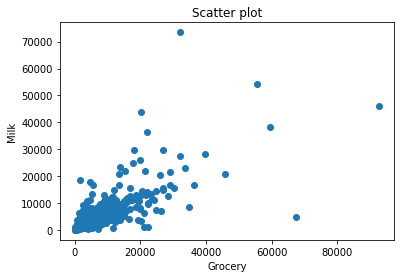

<Figure size 432x288 with 0 Axes>

In [34]:
# Write your answer from here, add more cells if needed
print('Correlation of Grocery and Milk',data_filt['Grocery'].corr(data_filt['Milk']))
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(data_filt['Grocery'],data_filt['Milk'])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.title('Scatter plot')
plt.show()
#
plt.figure()
pd.plotting.scatter_matrix(data_filt)
#
plt.figure()
sns.heatmap(data_filt)

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [46]:
# Write your answer from here, add more cells if needed
from scipy import stats
correlation, pvalue = stats.pearsonr(data_filt['Grocery'],data_filt['Milk'])
print('correlation and pvalue of (Grocery, Milk) are respectively: \n ',correlation,'and',pvalue)
correlation1, pvalue1 = stats.pearsonr(data_filt['Fresh'],data_filt['Grocery'])
print('correlation and pvalue of (Grocery, Fresh) are respectively: \n ',correlation1,'and',pvalue1)
correlation2, pvalue2 = stats.pearsonr(data_filt['Milk'],data_filt['Fresh'])
print('correlation and pvalue of (Fresh,Milk) are respectively: \n ',correlation1,'and',pvalue1)

print('With p-given=0.1, p-value nearly 0, we accept the hypothesis "Grocery and Milk are corelated"\
and reject the null hypohesis')


correlation and pvalue of (Grocery, Milk) are respectively: 
  0.7283351181536448 and 6.480570788053402e-74
correlation and pvalue of (Grocery, Fresh) are respectively: 
  -0.011853874984010514 and 0.8041728013490431
correlation and pvalue of (Fresh,Milk) are respectively: 
  -0.011853874984010514 and 0.8041728013490431
With p-given=0.1, p-value nearly 0, we accept the hypothesis "Grocery and Milk are corelated"and reject the null hypohesis


### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

Text(0.5,1,'Good log data')

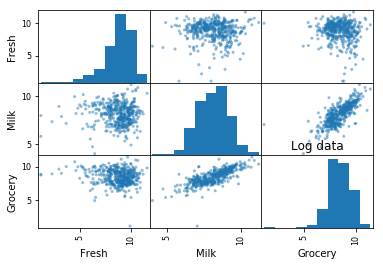

<Figure size 432x288 with 0 Axes>

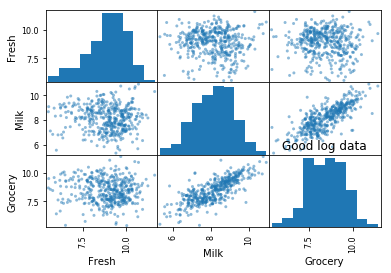

In [78]:
# Write your answer from here, add more cells if needed
log_data=np.log(data_filt)
good_log_data=log_data
pd.plotting.scatter_matrix(log_data)
plt.title('Log data')
#print(log_data.head())
iqr_f=stats.iqr(log_data['Fresh'])
iqr_m=stats.iqr(log_data['Milk'])
iqr_g=stats.iqr(log_data['Grocery'])
q1_f=log_data['Fresh'].quantile(q=0.25)
q1_m=log_data['Milk'].quantile(q=0.25)
q1_g=log_data['Grocery'].quantile(q=0.25)
q3_f=log_data['Fresh'].quantile(q=0.75)
q3_m=log_data['Milk'].quantile(q=0.75)
q3_g=log_data['Grocery'].quantile(q=0.75)
bole1=(log_data['Fresh']<q3_f+iqr_f*1.5) & (log_data['Fresh']>q1_f-iqr_f*1.5)
good_log_data.Fresh=log_data.Fresh[bole1]

bole2=(log_data['Milk']<q3_m+iqr_m*1.5) & (log_data['Milk']>q1_m-iqr_m*1.5)
good_log_data.Milk=log_data.Milk[bole2]

bole3=(log_data['Grocery']<q3_g+iqr_g*1.5) & (log_data['Grocery']>q1_g-iqr_g*1.5)
good_log_data.Grocery=log_data.Grocery[bole3]

plt.figure()
pd.plotting.scatter_matrix(log_data)
plt.title('Good log data')


### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [91]:
# Write your answer from here, add more cells if needed